# Practical 3: Artificial Neural Network

This is the first task of Practical 3. You will build a neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 
You will build the classifier from scartch. 

We will mark your code based on the accuracy of your model. You should get **at least 97%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

In [2]:
tf.__version__

'2.3.0'

In [3]:
tf.keras.__version__

'2.4.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

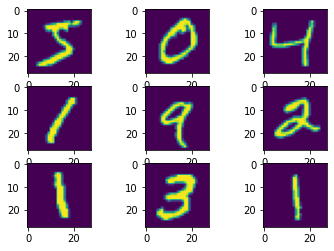

(60000, 28, 28)

In [4]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

In [5]:
# nomarlize
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [6]:
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

y_train_full[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
# randomly set validation data set
np.random.seed(42) 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

In [8]:
shuffled_indices

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Build and train the model

Build and train your model. 

In [10]:
# TODO: Build your model
firANN = keras.models.Sequential()
firANN.add(keras.layers.Flatten(input_shape = [28,28]))
firANN.add(keras.layers.Dense(300, activation = "relu",
               kernel_initializer='he_uniform',
               kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
               bias_regularizer=regularizers.l2(1e-4),
               activity_regularizer=regularizers.l2(1e-5)
               ))
firANN.add(keras.layers.Dropout(0.2))
firANN.add(keras.layers.Dense(300, activation = "relu",
               kernel_initializer='he_uniform',
               kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
               bias_regularizer=regularizers.l2(1e-4),
               activity_regularizer=regularizers.l2(1e-5)
               ))
firANN.add(keras.layers.Dropout(0.2))
firANN.add(keras.layers.Dense(300, activation = "relu",
               kernel_initializer='he_uniform',
               kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
               bias_regularizer=regularizers.l2(1e-4),
               activity_regularizer=regularizers.l2(1e-5)
               ))
firANN.add(keras.layers.Dropout(0.2))
firANN.add(keras.layers.Dense(10, activation = "softmax"))

In [11]:
# show the structure of your model
firANN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0

In [12]:
print(firANN.layers)

[<tensorflow.python.keras.layers.core.Flatten object at 0x00000146CD067488>, <tensorflow.python.keras.layers.core.Dense object at 0x00000146CD1CF888>, <tensorflow.python.keras.layers.core.Dropout object at 0x00000146CD1CFC08>, <tensorflow.python.keras.layers.core.Dense object at 0x00000146CD28AF08>, <tensorflow.python.keras.layers.core.Dropout object at 0x00000146CF7F73C8>, <tensorflow.python.keras.layers.core.Dense object at 0x00000146CA4D78C8>, <tensorflow.python.keras.layers.core.Dropout object at 0x00000146CA4E1348>, <tensorflow.python.keras.layers.core.Dense object at 0x00000146CA702688>]


## Fitting the model

In [13]:
# fitting model: loss function; optimizer; evaluation metrics
firANN.compile(loss = "categorical_crossentropy",
              optimizer = keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [14]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
history = firANN.fit(X_train, y_train, batch_size=64, epochs=30, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping_cb])

Epoch 1/30
860/860 [==============================] - 7s 8ms/step - loss: 0.6116 - accuracy: 0.9097 - val_loss: 0.3927 - val_accuracy: 0.9658
Epoch 2/30
860/860 [==============================] - 7s 8ms/step - loss: 0.3903 - accuracy: 0.9595 - val_loss: 0.3190 - val_accuracy: 0.9750
Epoch 3/30
860/860 [==============================] - 7s 8ms/step - loss: 0.3233 - accuracy: 0.9665 - val_loss: 0.2898 - val_accuracy: 0.9700
Epoch 4/30
860/860 [==============================] - 6s 7ms/step - loss: 0.2791 - accuracy: 0.9718 - val_loss: 0.2449 - val_accuracy: 0.9792
Epoch 5/30
860/860 [==============================] - 7s 8ms/step - loss: 0.2527 - accuracy: 0.9736 - val_loss: 0.2508 - val_accuracy: 0.9706
Epoch 6/30
860/860 [==============================] - 6s 8ms/step - loss: 0.2327 - accuracy: 0.9753 - val_loss: 0.2175 - val_accuracy: 0.9784
Epoch 7/30
860/860 [==============================] - 7s 8ms/step - loss: 0.2228 - accuracy: 0.9750 - val_loss: 0.2248 - val_accuracy: 0.9772
Epoch 

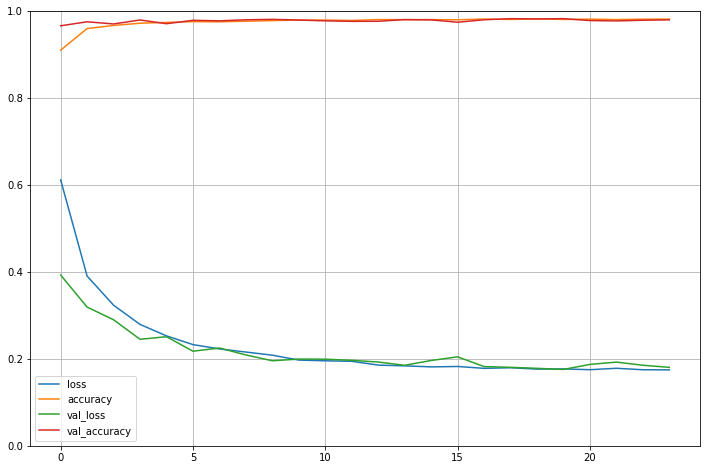

In [15]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

In [16]:
firANN.save('mnist.firANN') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mnist.firANN\assets


## Load the model and evaluate it on the test data

In [17]:
firShot = keras.models.load_model("mnist.firANN")
firShot.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1800 - accuracy: 0.9814


[0.17998729646205902, 0.9814000129699707]

# Practical 3 Report

Data Preparation
* normalize our data by dividing 255.0 to accelerate the computation process
* transform our target with one-hot encoding to use categorical cross-entropy

Building Model——Model Architecture 
* Using sequential full connection model
* Totally, we make 5 layers (1 input layer, 3 hidden layers, and 1 output layer)
  * input flatten layer to transform grid-like data to vector-like data 
  * 3 hidden layers to learn the underlying features of digital number
    * Why choosing 3 hidden layers? Given the simple characteristics of the written number, 3 hidden layers are enough to capture those characteristics, though a better way might be using the Across Validation method to decide
    * same number of units (300) in each hidden layer
  * output layer with softmax for categorical classifier
* strategies intending to avoid vanishing gradient
  * He initialization to make sure initial weight and bais term assigned appropriately
  * ReLU activation function with only one side saturate
* strategies intending to balance between underfitting and overfitting
  * Choosing (hopefully) enough units in hidden layer firstly to at least fit the model well enough
  * Then, using regularization method to avoid overfitting
    * l-1 and l-2 regularization for weights
    * l-2 for bias term
    * l-2 for activation function
  * Adding Dropout

Fitting model
* Optimization Method: Adaptive momentum optimizer
  * Combining the ideas of momentum optimization and adaptive learning rates aiming at a faster convergence
  * batch size: 64
* Early stopping: stop the optimization if validation error flattens to avoid overfitting
* Epochs: 30 times to fitting our model enough; additionally, carried by early stopping device, we could stop unfruitful model fitting when validation error flattens

Contribution statement
* Each group member write this practical code first
* Communicating and discussing each one's result and choosing the optimal one solution 
* Contributing **equally** to this practical project

Tinghuan, Hongjie, Yilan